In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [124]:
url=r"https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv"

In [125]:
#downloading and exploring the dataset
#shaping the data set')
df=pd.read_csv(url)

In [126]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [127]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Statistical Analysis


In [128]:
#Data Integrity Check

In [129]:
df.duplicated().sum() # This check any if any duplicated entry exit in dataset 

0

In [130]:
##Comment:
#Dataset doesnot contain Any duplicate entry. So Yes To Go !!!

# Datatype Check

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Comment :
#In loan application status dataset we have 614 rows with 13 columns including target variable.
#A Target Variable is 'Loan_Status' having object datatype and It is categorical variable.
#Gender, Married, Education,Self Employed, Credit History, Loan Status are categorical features.
#There are three types of datatype dtypes: float64(4), int64(1), object(8)

In [132]:
#Missing value check

In [133]:
 df.isnull().sum().sort_values(ascending = False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

##Comment :
7 out 13 columns contains missing value.
As small amount of data is missing so we use mean amd mode to replace with NaN values.


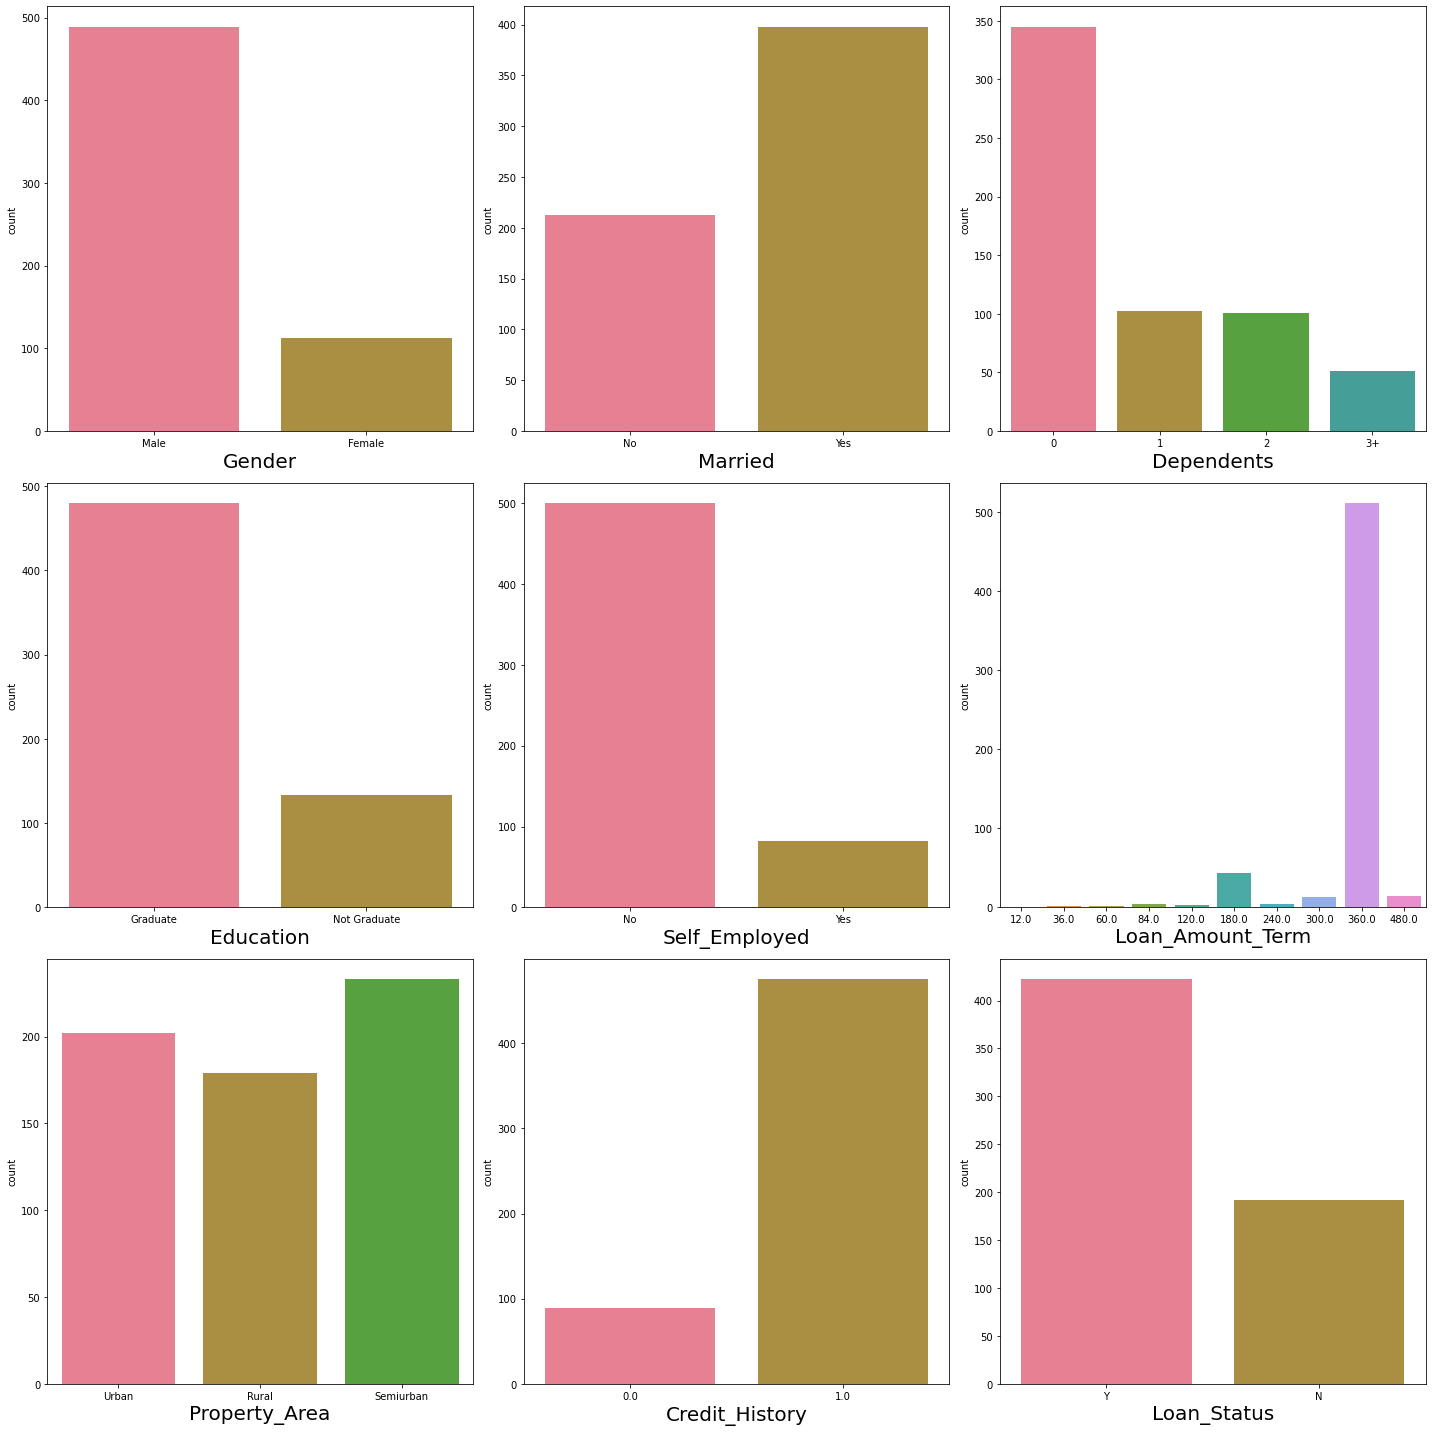

In [134]:
#explore categorical features before missing value imputation.

plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
category=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in category:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()


##Comment:
1. Out of Total loan application 80 % applicants are Male. We can Explore loan amount for each gender applied and evaluate whether on the same basis loan is approved for each gender or not?
2. Only 20% applicants are self employed. So it will interesting to gain insight on relation between Applicant income and loan approval for non self employed category. We will look to find any benchmark range of Income for loan approval.Another benchmark we will try to find is about loan requirement for these two categories.
3. Nearly 70% are married and 75% of loan applicants are graduates
4. Almost 60% of the applicants have no dependents.
5. Most of applicants come from Semi Urban areas, followed by Urban and Rural areas.
6. 80% people previously have credit history. Normally people having credit history are seen more prone to get loan approval.
7. Nearly 70 % applicant gets loan approved.
We can impute categoical variable with mode in that category. For numerical variable we have option of mean and median. If Outliers are to strech then we will impute with median.

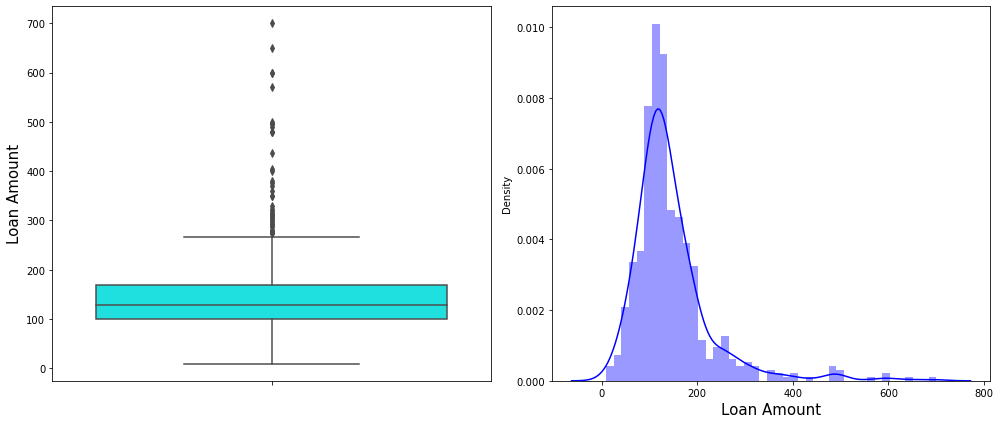

In [135]:
#Let check outliers for missing values Numerical variable having missing values by plotting boxplot.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='LoanAmount', data=df,color='cyan')
plt.ylabel('Loan Amount',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['LoanAmount'], color='b')
plt.xlabel('Loan Amount',fontsize=15)
plt.tight_layout()
plt.show()

#Comment -
1.The mean is greater than median loan amount.
2.Clearly we can see outliers in boxplot and feature is strecth to far in distribution plot.
As extreme outliers are present in feature and for that reason as data is more sensitive to mean we are going to impute missing values in loan amount with median.



#Imputation of Missing values
Imputation details :
Missing values in Loan amount is impute with median value.
Maximum Loan term is 360 Months so Missing value in Loan amount term is replace with 360 Months.
Credit History, Self Employed, dependents, Gender and Married are replace with mode of repective features.


In [136]:
# Imputating Missing value with mode for categorical features
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

# Imputation of Numerical features
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [137]:
df.isnull().sum().sort_values(ascending = False)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [138]:
##Statistical Matrix

In [139]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


##Comment:
1. In Applicant Income & Coapplicant Income Std deviation value is greater than median. So data is spread and skewed.
2. Taking 75% and Max rows into consideration we can surely say that Outliers exist in Applicant Income, Coapplicant Income,Loan Amount.
3. Since Credit History is Categorical variable there is no significance in different statstical parameter of it.
4. Minimum Tenure for Loan is 12 Months and Maximum Loan tenure is 480 Months.
5. Minimum Applicant income is 150 and maximum is 81000.

In [140]:
##exploration of Target and independent feature.

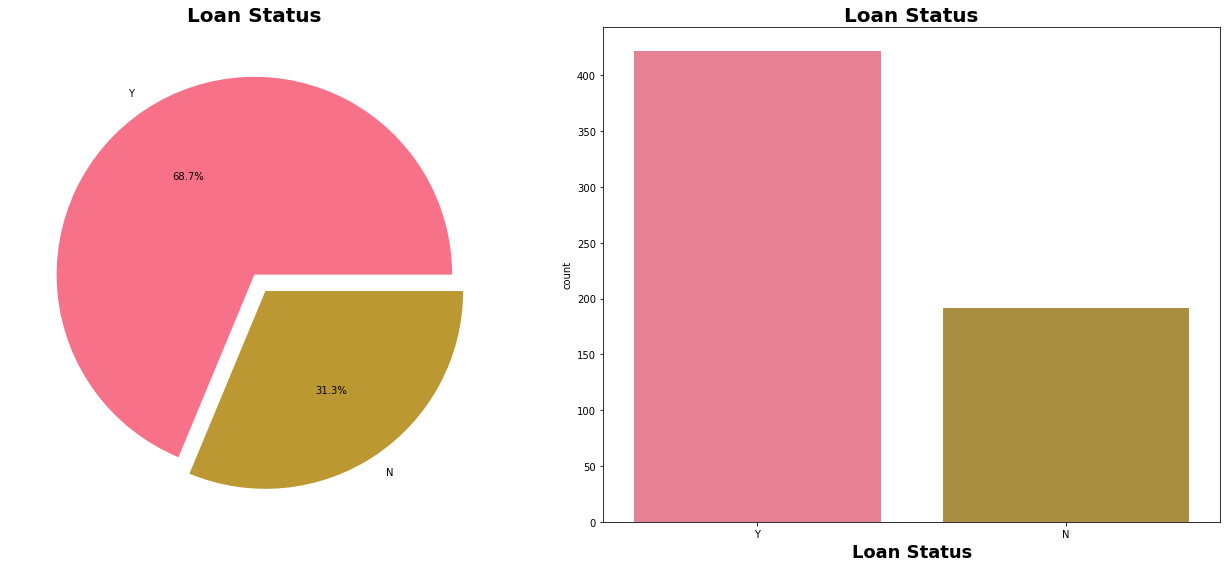

In [141]:
#loan population status

f,ax=plt.subplots(1,2,figsize=(18,8))
df['Loan_Status'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                           ax=ax[0])
ax[0].set_title('Loan Status', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Loan_Status',data=df,ax=ax[1])
ax[1].set_title('Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Loan Status",fontsize=18,fontweight ='bold')
plt.show()


##Comment :
68.7% Applicants gets loan Approval.
We can see that dataset is imbalanced in nature.


In [142]:
##Gender Vs Loan Status

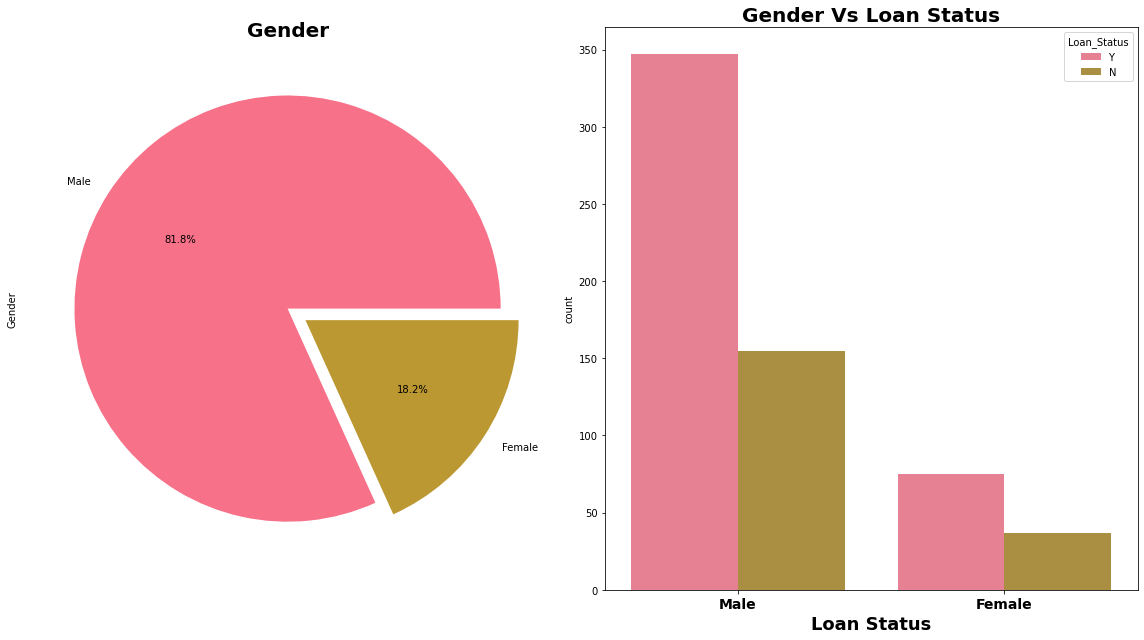

In [143]:
f,ax=plt.subplots(1,2,figsize=(16,9))
df['Gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                           ax=ax[0])
ax[0].set_title('Gender', fontsize=20,fontweight ='bold')

sns.countplot('Gender',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('Gender Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Loan Status",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [144]:
pd.crosstab(df['Gender'],df["Loan_Status"], margins=True)

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,155,347,502
All,192,422,614


#Comment :
1. 181.8% Applicant are male.
2. Irrespective Gender 65 % Applicant from each gender gets loan approval.It means that gender doesnot play any role loan approval. No Discrimation on name of Gender done.


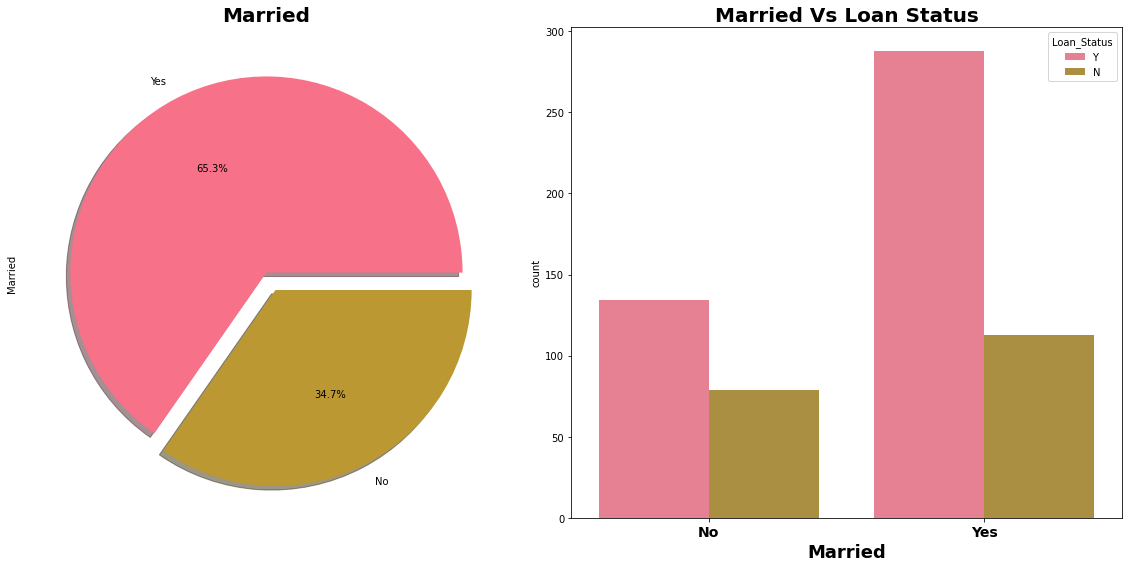

In [145]:
#Married Vs Loan Status

f,ax=plt.subplots(1,2,figsize=(16,8))
df['Married'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                           ax=ax[0],shadow=True)
ax[0].set_title('Married', fontsize=20,fontweight ='bold')

sns.countplot('Married',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('Married Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Married",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()


In [146]:
pd.crosstab([df['Gender'],df['Married']],[df.Loan_Status],margins=True)

Loan_Status       N    Y  All
Gender Married               
Female No        29   51   80
       Yes        8   24   32
Male   No        50   83  133
       Yes      105  264  369
All             192  422  614

#Comment:
1. 65.3 % loan applicants are married. We can see from Count plot that Married people have more possibility of getting loan approval.
2. But Here comes Interesting observation from crosstab :
3. Unmarried Women are more chances of getting loan approval compare to married women.We will try to find which factor actually play deciding role here like education, employeement or Income.
4. Married Men are more chances of loan approval.

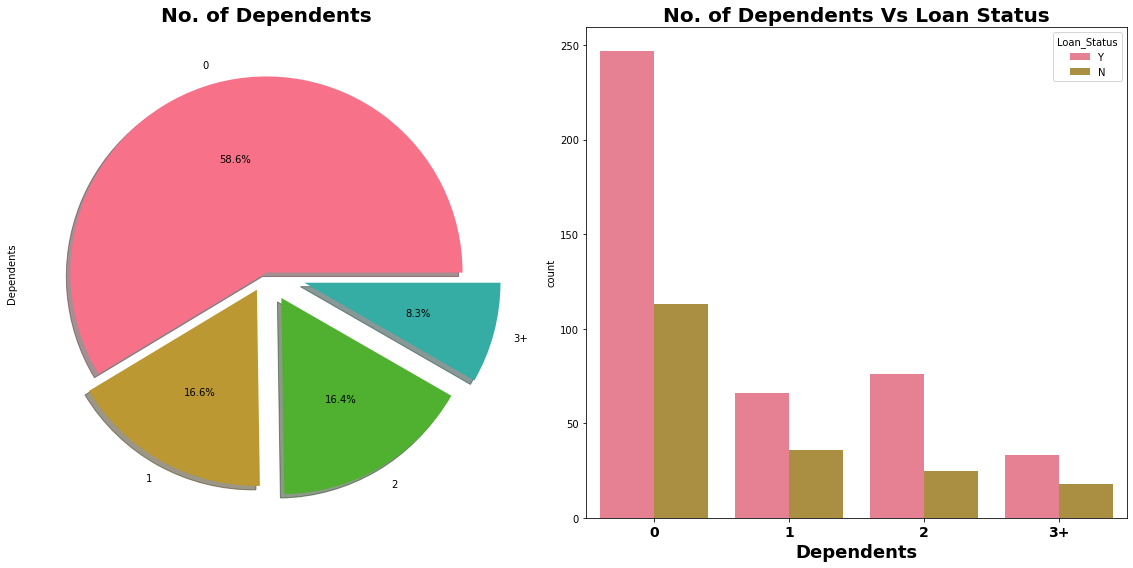

In [147]:
#dependents 
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Dependents'].value_counts().plot.pie(explode=[0,0.1,0.15,0.2],autopct='%2.1f%%',
                                          ax=ax[0],shadow=True)
ax[0].set_title('No. of Dependents', fontsize=20,fontweight ='bold')

sns.countplot('Dependents',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('No. of Dependents Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Dependents",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()


In [148]:
pd.crosstab([df['Dependents'],df['Gender']],[df.Loan_Status],margins=True)

Loan_Status          N    Y  All
Dependents Gender               
0          Female   27   56   83
           Male     86  191  277
1          Female    6   13   19
           Male     30   53   83
2          Female    2    5    7
           Male     23   71   94
3+         Female    2    1    3
           Male     16   32   48
All                192  422  614

##Comment:
1. 58.6% Applicants have no dependents on them.33% Applicants have either 1 or 2 dependents. It will interesting check whether with increase in number dependents their is increase in requirement loan amount.
2. Female having zero dependents have more chances to get loan approval compare to Females with dependents.
3. For male Maximum loan approval comes with 0 dependents followed by 2 dependents.

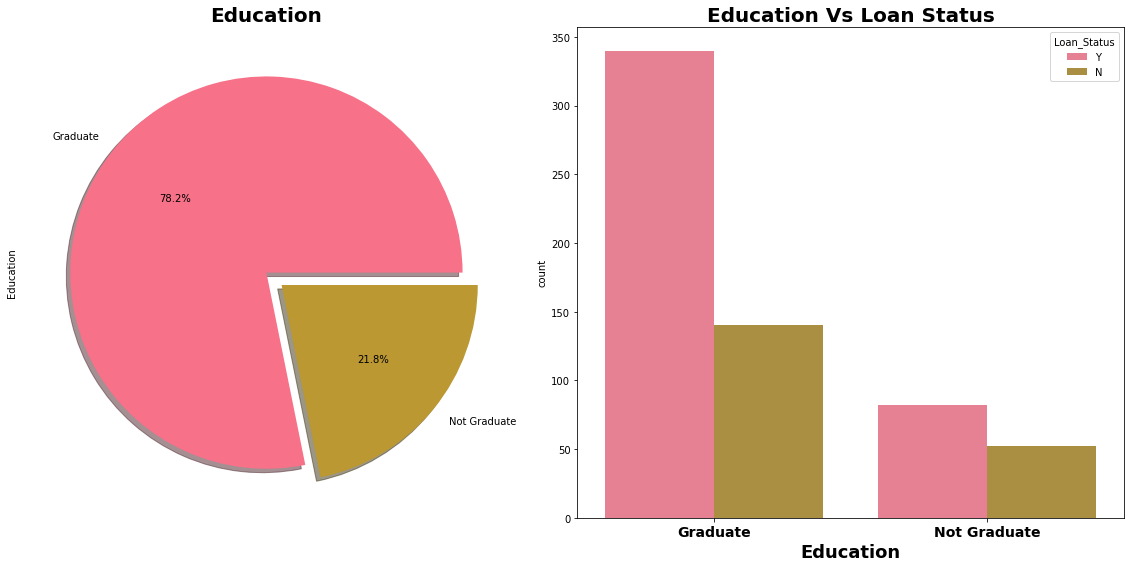

In [149]:
##Education Vs Loan status
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Education'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                           ax=ax[0],shadow=True)
ax[0].set_title('Education', fontsize=20,fontweight ='bold')

sns.countplot('Education',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('Education Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Education",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [150]:
pd.crosstab([df['Education'],df['Gender']],[df.Loan_Status],margins=True)

Loan_Status            N    Y  All
Education    Gender               
Graduate     Female   31   61   92
             Male    109  279  388
Not Graduate Female    6   14   20
             Male     46   68  114
All                  192  422  614

#Comment:
Graduate applicants are more likely to get loan approval irrespective gender.


In [151]:
#Encoding categorical data

Category=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

# Using Label Encoder on categorical variable

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


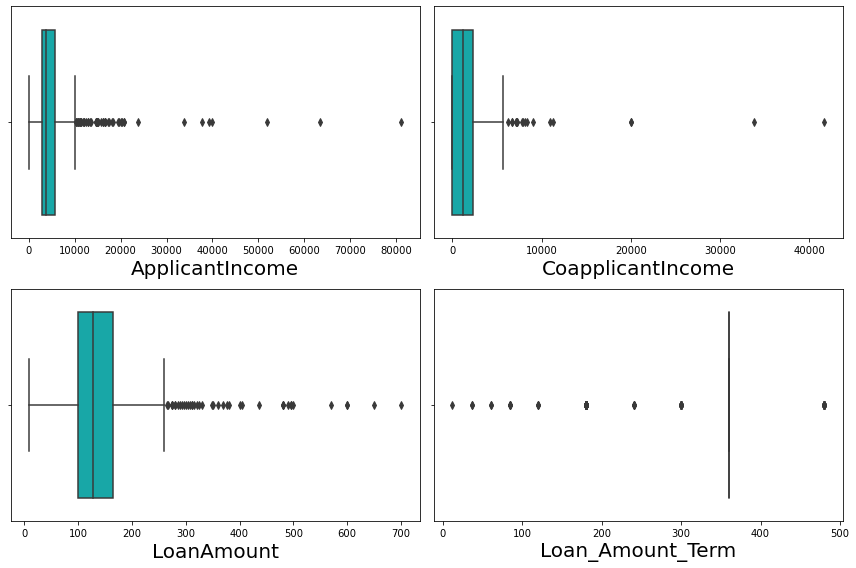

In [152]:
#Feature selection and Engineering

#1. Outliers Detection and Removal

Numerical =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

plt.figure(figsize=(12,8),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()


In [153]:
##outliers exist dataset.


In [154]:
# Droping unnecessary columns
df.drop(["Loan_ID"], axis=1, inplace=True)


## Skewness of features

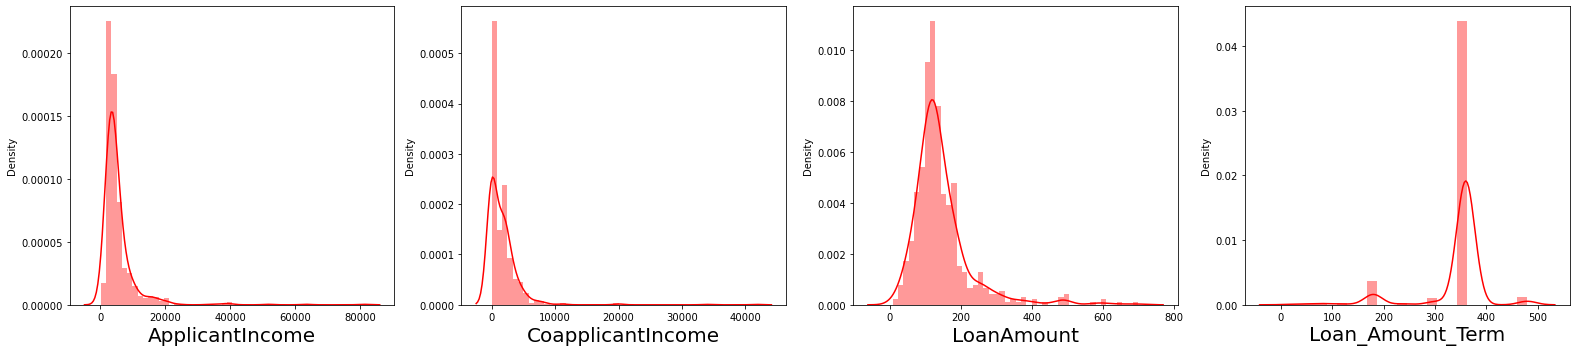

In [155]:
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in Numerical:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(df[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [156]:
df.skew()

Gender              -1.648795
Married             -0.644850
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

#Comment :
1. Out of all above feature 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' are skewed which are numerical feature.
2. Other features are categorical in nature so skewness is nothing to do with these remaining feature.We will ignore them.


In [157]:
 #Removing skewness using yeo-johnson  method to get better prediction
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [158]:
df[skew] = pt.fit_transform(df[skew].values)
df[skew].head()


,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.544331,-1.102837,-0.025462
1,0.170974,0.750578,-0.025462
2,-0.499955,-1.102837,-1.339826
3,-0.743873,0.891686,-0.155876
4,0.582817,-1.102837,0.170931


In [159]:
#checking skweness, after power transformer
df.skew()

Gender              -1.648795
Married             -0.644850
Education            1.367622
Self_Employed        2.159796
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.020831
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [160]:
#skweness has rduced ,we can move forward


##3. Corrleation

In [161]:

df.corr()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.045364,-0.000525,0.087227,0.219590,0.142137,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.012304,0.004489,0.016968,0.312596,0.179350,-0.100912,0.010938,0.004257,0.091478
Education,0.045364,0.012304,1.000000,-0.010383,-0.178206,0.038406,-0.149533,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,-0.010383,1.000000,0.185468,-0.089864,0.111002,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.087227,0.016968,-0.178206,0.185468,1.000000,-0.367287,0.483447,-0.030586,0.012667,-0.029386,0.013568
CoapplicantIncome,0.219590,0.312596,0.038406,-0.089864,-0.367287,1.000000,0.136998,0.012502,0.007486,-0.055421,0.056869
LoanAmount,0.142137,0.179350,-0.149533,0.111002,0.483447,0.136998,1.000000,0.081971,-0.016884,-0.092640,-0.038533
Loan_Amount_Term,-0.074030,-0.100912,-0.073928,-0.033739,-0.030586,0.012502,0.081971,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.073658,-0.001550,0.012667,0.007486,-0.016884,-0.004705,1.000000,0.001963,0.540556
Property_Area,-0.025752,0.004257,-0.065243,-0.030860,-0.029386,-0.055421,-0.092640,-0.076120,0.001963,1.000000,0.032112


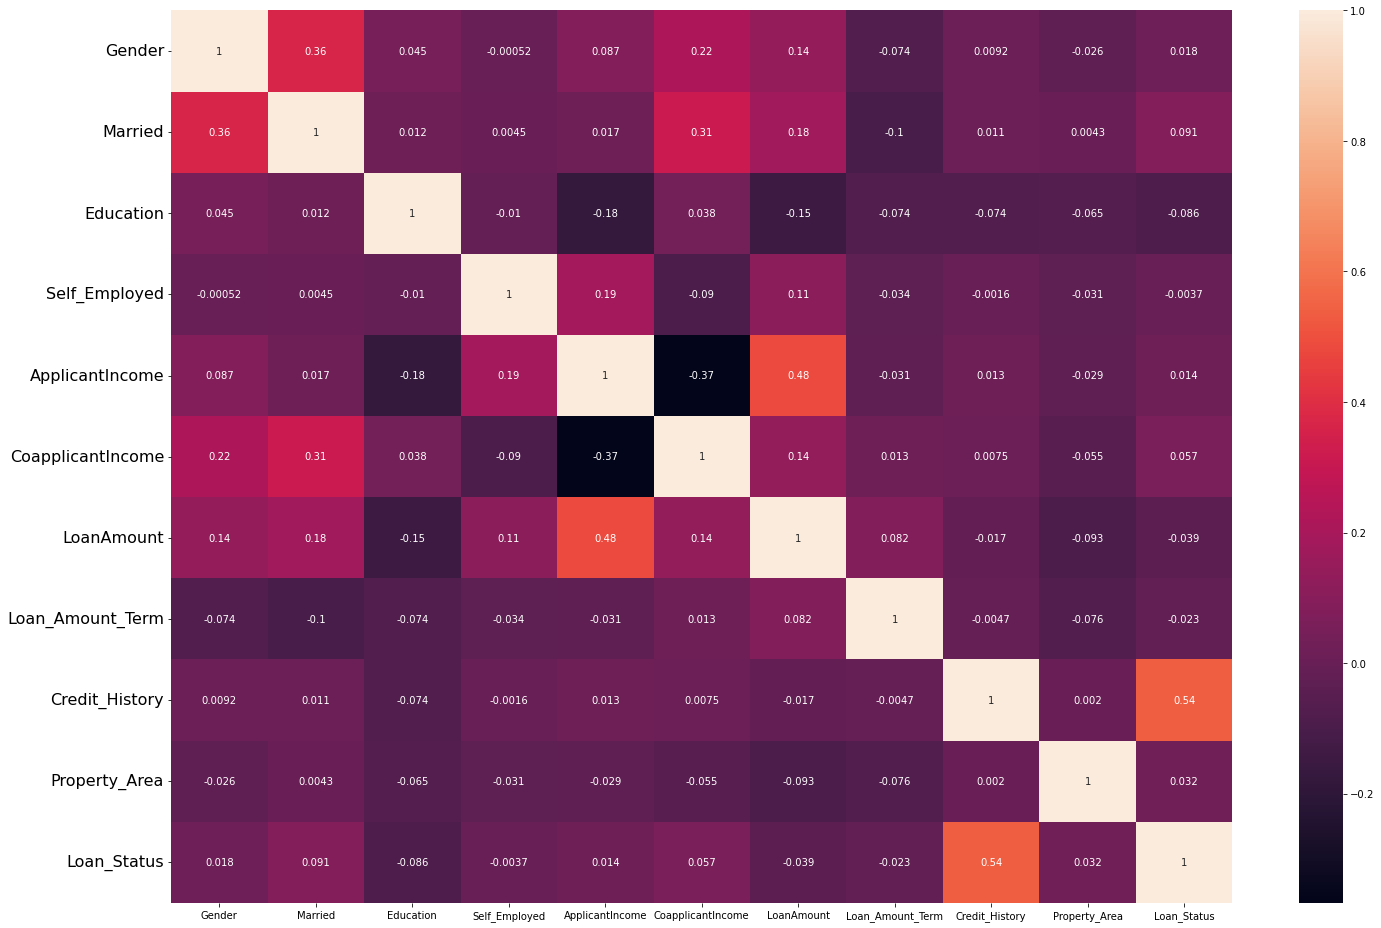

In [162]:
plt.figure(figsize=(21,13))
sns.heatmap(df.corr(),  annot=True)
plt.yticks(fontsize=16)
plt.show()
            

In [163]:
##Maximum correlation of 0.561 exist between Credit History and Loan status.

In [164]:
# Splitting data in target and dependent feature
X = df.drop(['Loan_Status'], axis =1)
Y = df['Loan_Status']

In [193]:
X=df.drop(['Dependents'],axis=1)

In [194]:
df.tail(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
594,1,1,0,0,1,2.000952,-1.102837,1.438871,360.0,1.0,2,1
595,1,0,0,1,0,-0.108477,-1.102837,-0.330910,360.0,1.0,0,1
596,1,1,2,1,1,0.675836,0.624178,0.750522,360.0,1.0,0,0
597,1,0,0,0,0,-0.506981,-1.102837,-0.775601,360.0,0.0,1,0
598,1,1,0,0,1,1.328221,-1.102837,0.671658,360.0,1.0,0,1
599,1,1,2,0,0,0.526379,-1.102837,0.805166,360.0,1.0,2,1
600,0,0,3+,0,0,-4.035496,1.892798,2.070562,180.0,1.0,2,0
601,1,1,0,1,0,-0.558247,0.945996,0.364208,360.0,1.0,0,1
602,1,1,3+,0,0,0.506065,-1.102837,-0.025462,360.0,1.0,2,1
603,1,0,0,0,0,-0.174610,1.087396,0.577905,360.0,1.0,0,1


In [195]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [196]:
#Machine Learning Model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [197]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (429, 11)
Training target vector size: (429,)
Test feature matrix size: (185, 11)
Test target vector size: (185,)


Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.9945945945945946


Confusion matrix : 
 [[ 60   1]
 [  0 124]]


Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        61
           1       0.99      1.00      1.00       124

    accuracy                           0.99       185
   macro avg       1.00      0.99      0.99       185
weighted avg       0.99      0.99      0.99       185





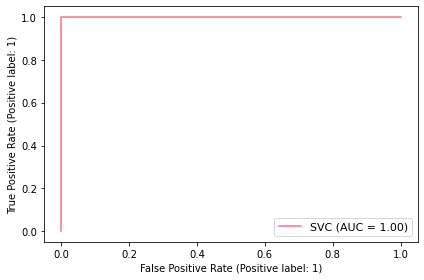

Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 1.0


Confusion matrix : 
 [[ 61   0]
 [  0 124]]


Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00       124

    accuracy                           1.00       185
   macro avg       1.00      1.00      1.00       185
weighted avg       1.00      1.00      1.00       185





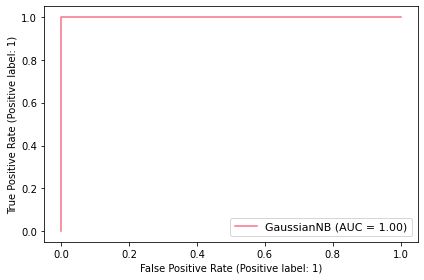

Classification ML Algorithm Evaluation Matrix DecisionTreeClassifier() is


Accuracy Score :
 1.0


Confusion matrix : 
 [[ 61   0]
 [  0 124]]


Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00       124

    accuracy                           1.00       185
   macro avg       1.00      1.00      1.00       185
weighted avg       1.00      1.00      1.00       185





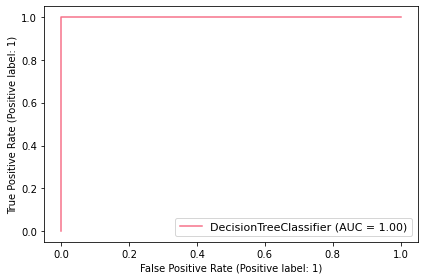

Classification ML Algorithm Evaluation Matrix KNeighborsClassifier(n_neighbors=3) is


Accuracy Score :
 0.9513513513513514


Confusion matrix : 
 [[ 53   8]
 [  1 123]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.87      0.92        61
           1       0.94      0.99      0.96       124

    accuracy                           0.95       185
   macro avg       0.96      0.93      0.94       185
weighted avg       0.95      0.95      0.95       185





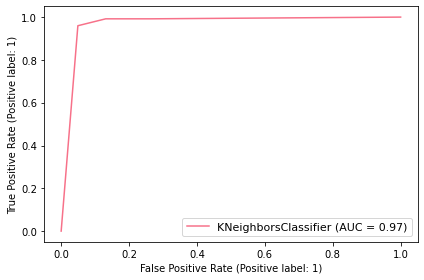

Classification ML Algorithm Evaluation Matrix RandomForestClassifier() is


Accuracy Score :
 1.0


Confusion matrix : 
 [[ 61   0]
 [  0 124]]


Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00       124

    accuracy                           1.00       185
   macro avg       1.00      1.00      1.00       185
weighted avg       1.00      1.00      1.00       185





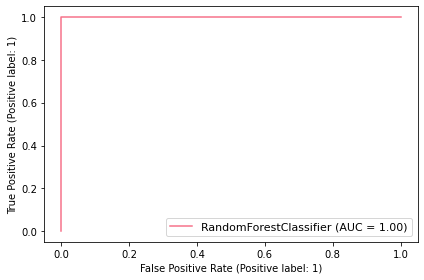

Classification ML Algorithm Evaluation Matrix ExtraTreesClassifier() is


Accuracy Score :
 1.0


Confusion matrix : 
 [[ 61   0]
 [  0 124]]


Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00       124

    accuracy                           1.00       185
   macro avg       1.00      1.00      1.00       185
weighted avg       1.00      1.00      1.00       185





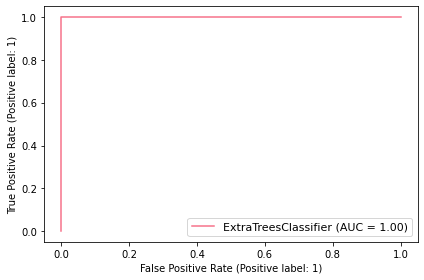

In [198]:
from sklearn.metrics import plot_roc_curve
model=[ 
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    disp = plot_roc_curve(m,X_test,Y_test)   
    plt.legend(prop={'size':11}, loc='lower right')
    plt.show()
    print('============================================================================================================')


In [200]:
#CrossValidation :
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
       
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [1. 1. 1. 1. 1.]
Mean Score : 1.0
Std deviation : 0.0




Cross Validation Score SVC() :

Score : [1.         0.99186992 1.         1.         1.        ]
Mean Score : 0.9983739837398374
Std deviation : 0.003252032520325221




Cross Validation Score DecisionTreeClassifier() :

Score : [1. 1. 1. 1. 1.]
Mean Score : 1.0
Std deviation : 0.0




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.97560976 0.96747967 0.96747967 0.99186992 0.94262295]
Mean Score : 0.9690123950419831
Std deviation : 0.015919125539426184




Cross Validation Score RandomForestClassifier() :

Score : [1. 1. 1. 1. 1.]
Mean Score : 1.0
Std deviation : 0.0




Cross Validation Score ExtraTreesClassifier() :

Score : [1. 1. 1. 1. 1.]
Mean Score : 1.0
Std deviation : 0.0


